In [1]:
import torch
from src.models.modnet import MODNet
from src.trainer import supervised_training_iter
from wraptrain import ReadImage,OriginModNetDataLoader,ImageMatteLoader,ModNetImageGenerator,NetTrainer

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-31 00:58:22.054813: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 00:58:22.101026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 00:58:22.101056: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 00:58:22.101082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alrea

In [2]:
import torch
print(torch.cuda.is_available())  # 如果输出为True，则表示PyTorch能够使用GPU


True


In [3]:
base_path = "/mnt/data/Train/"
fg = base_path+"FG"
matte= base_path+"Alpha"
files = ReadImage(fg,matte).read_same_names()

In [4]:
files.head(5)

FG                           Alpha
0  /mnt/data/Train/FG/0000.png  /mnt/data/Train/Alpha/0000.png
1  /mnt/data/Train/FG/0001.png  /mnt/data/Train/Alpha/0001.png
2  /mnt/data/Train/FG/0002.png  /mnt/data/Train/Alpha/0002.png
3  /mnt/data/Train/FG/0003.png  /mnt/data/Train/Alpha/0003.png
4  /mnt/data/Train/FG/0004.png  /mnt/data/Train/Alpha/0004.png

In [5]:
data = ImageMatteLoader(files)
data[1]

(<PIL.Image.Image image mode=RGB size=2350x1567>,
 <PIL.Image.Image image mode=L size=2350x1567>,
 <PIL.Image.Image image mode=L size=2350x1567>)

In [6]:
all_data = OriginModNetDataLoader(files,[512,512])

In [7]:
len(all_data)

2000

In [8]:
all_data[1]

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]], device='cuda:0'),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0., 

In [9]:
#[[all_data[i][0].size(),all_data[i][1].size() ,all_data[i][2].size() ] for i in range(1,20)]
#[all_data[i][0].size()  for i in range(1,20)]

In [10]:
#aim_model = NetTrainer(MODNet(),ckpt_path="pretrained/modnet_photographic_portrait_matting.ckpt")
bad_model = NetTrainer(MODNet())

In [11]:
test = ModNetImageGenerator(files,bad_model.get_model())
#aim = ModNetImageGenerator(files,aim_model.get_model())
org = ImageMatteLoader(files)

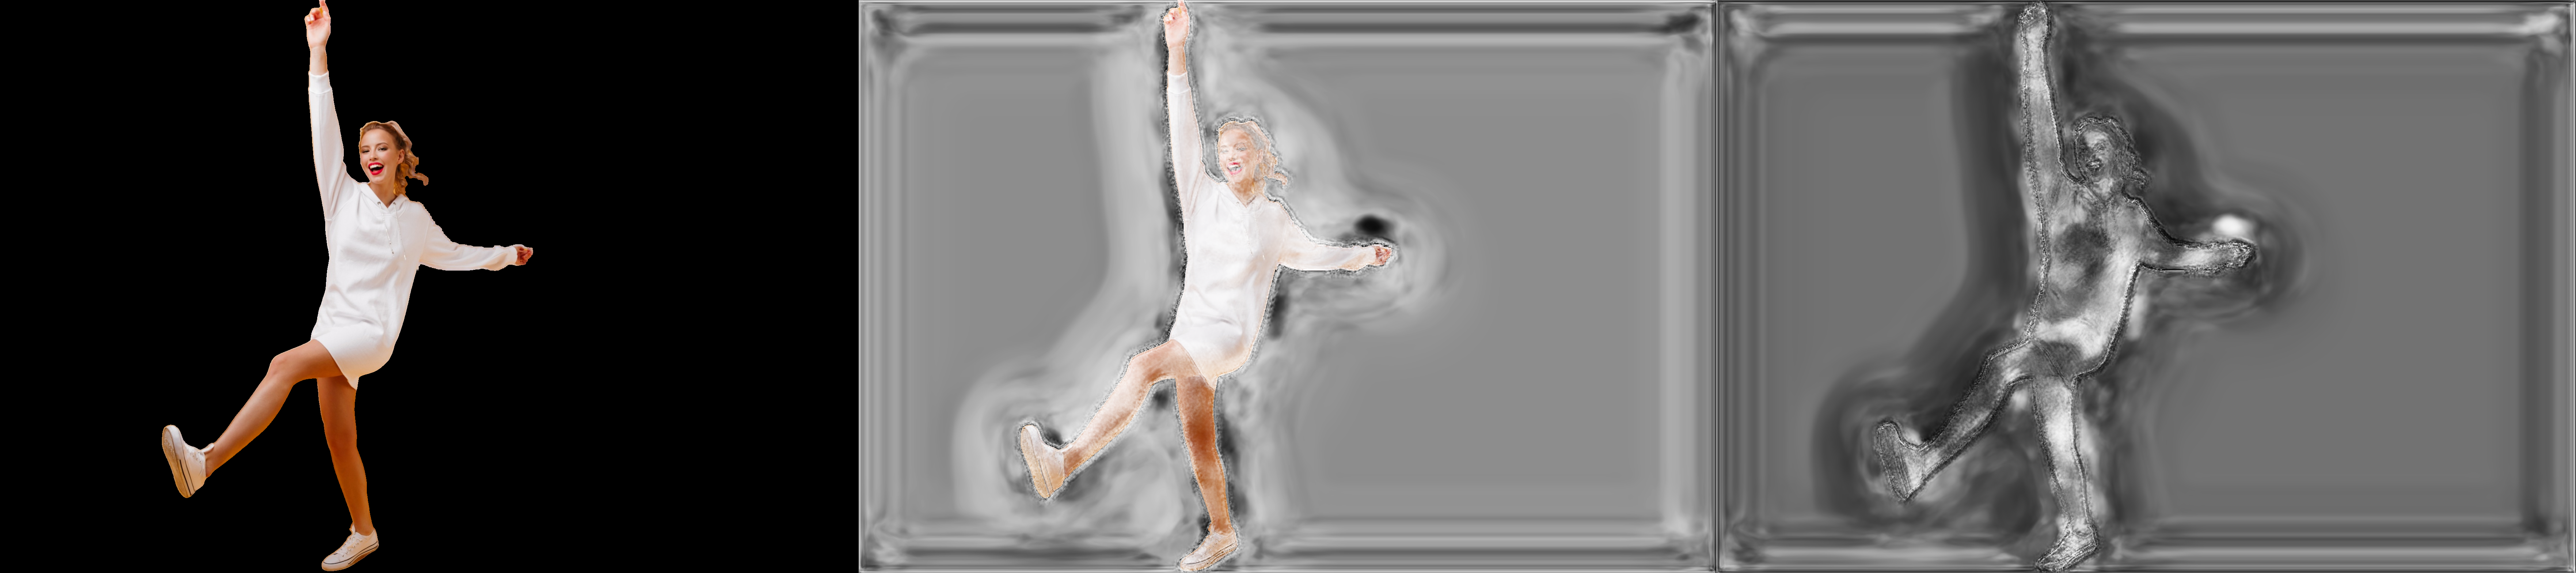

In [12]:
test.show(1)

In [13]:
aim.show(1)


NameError: name 'aim' is not defined

In [ ]:
itrained.evaluate([1,2,3,4,5])

In [ ]:
test.evaluate([1,2,3,4,5])

In [ ]:
aim.evaluate([1,2,3,4,5])